In [63]:
# Women's primary Education Completion Rate (worldwide)

In [64]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [65]:
%matplotlib inline

In [66]:
plt.rcParams["figure.figsize"] = (10, 5)

In [67]:
saved_style_state = matplotlib.rcParams.copy() 

In [68]:
edu_data = pd.read_csv("primary_education_data.csv")
print("done")

done


In [69]:
edu_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,101.255234,101.55587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.028069,66.26329,66.115013,66.932449,68.167793,69.499100,69.990547,70.825378,NaN,NaN
2,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.604069,66.688881,67.129303,65.761513,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.063690,64.65110,65.822060,66.608093,66.362289,66.722877,66.927361,67.231689,NaN,NaN
4,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
edu_data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
158,Mali,MLI,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,49.749210,48.045620,47.862358,47.140911,NaN,NaN,NaN,NaN,NaN
9,Argentina,ARG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,101.175209,102.590393,102.477333,104.334892,99.693207,98.436546,98.176582,101.582382,NaN,NaN
187,Philippines,PHL,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.720070,NaN,105.135063,109.614143,113.393303,105.051773,102.834763,95.139595,NaN
97,Honduras,HND,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.394669,79.124779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,INX,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

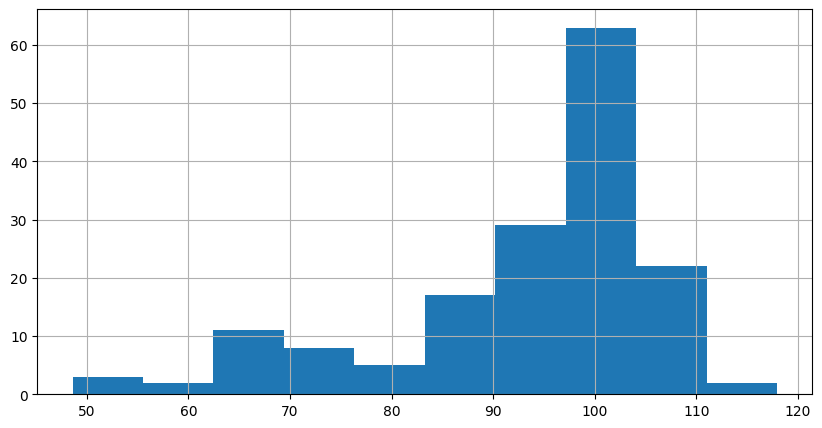

In [71]:
edu_data["2020"].hist()

<Axes: ylabel='Country Name'>

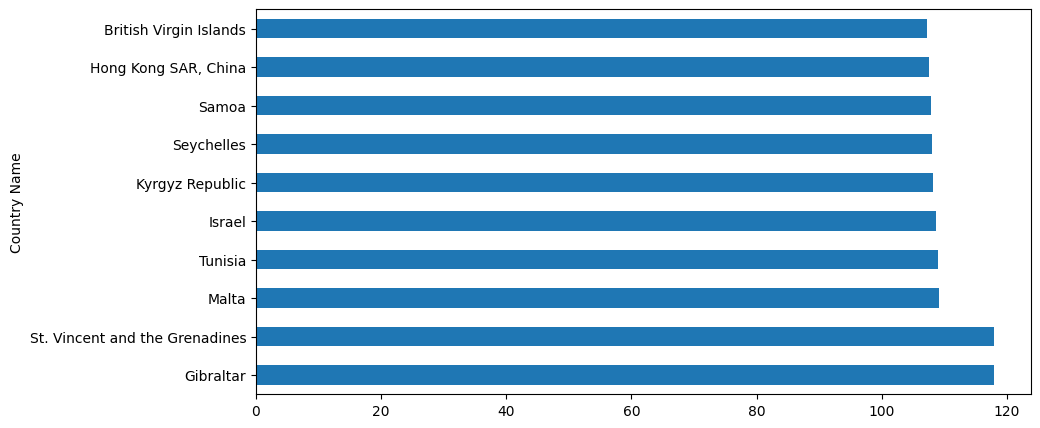

In [72]:
largest = edu_data.nlargest(10, ["2020"]) 
largest.set_index("Country Name")["2020"].plot(kind="barh")

<Axes: >

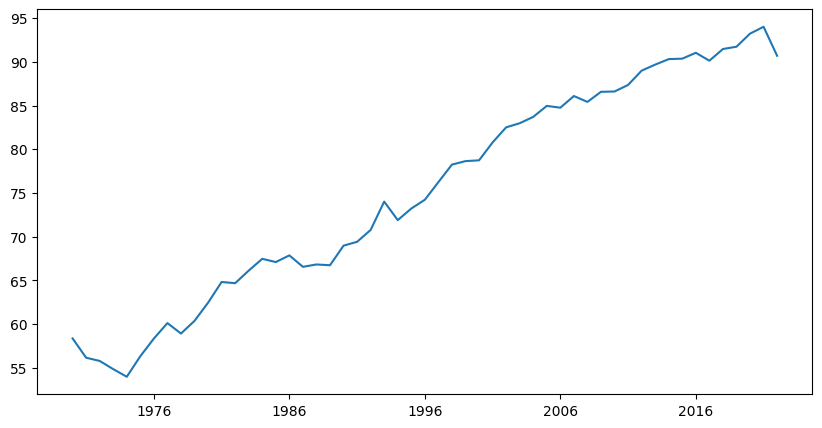

In [73]:
def col_mean(col):
    try :

        return col.mean()
    except:
        pass

edu_data.apply(col_mean,axis=0).plot()


In [74]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


edu_path = r'C:\Users\13766\1161\data_project_2023\primary_education_data.csv'

In [75]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [76]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
edu_data = pd.read_csv("C:\\Users\\13766\\1161\\data_project_2023\\primary_education_data.csv")
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

C:\Users\13766\AppData\Local\Temp\ipykernel_11848\3493916857.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))


In [77]:
edc = set(edu_data["Country Name"])
wcc = set(world.name)
print(len(edc), len(wcc))
print(list(edc - wcc))

266 176
['Sao Tome and Principe', 'Middle East & North Africa (excluding high income)', 'Eswatini', 'Sint Maarten (Dutch part)', 'Pre-demographic dividend', 'Korea, Rep.', 'Congo, Rep.', 'IDA total', 'Europe & Central Asia', 'Micronesia, Fed. Sts.', 'European Union', 'Central Europe and the Baltics', 'IDA & IBRD total', 'Least developed countries: UN classification', 'Middle East & North Africa (IDA & IBRD countries)', 'Kiribati', 'Sub-Saharan Africa (excluding high income)', 'Bermuda', 'Euro area', 'Fragile and conflict affected situations', 'South Sudan', 'Solomon Islands', 'Upper middle income', 'Egypt, Arab Rep.', 'Marshall Islands', 'Curacao', 'Turks and Caicos Islands', 'Macao SAR, China', "Korea, Dem. People's Rep.", 'St. Kitts and Nevis', 'West Bank and Gaza', 'United States', 'Venezuela, RB', 'Europe & Central Asia (excluding high income)', 'Virgin Islands (U.S.)', 'Hong Kong SAR, China', 'Lower middle income', 'Iran, Islamic Rep.', 'Tuvalu', 'IDA blend', 'Congo, Dem. Rep.', '

In [78]:
'FJI' in list(world.iso_a3)

True

In [79]:
iso_codes = list(world.iso_a3)
overlapping_codes_df = edu_data[[cc in iso_codes for cc in edu_data["Country Code"]]]

In [80]:
merged_df = overlapping_codes_df.merge(world, left_on='Country Code', right_on='iso_a3')
merged_df = gp.GeoDataFrame(merged_df)
merged_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,65.761513,NaN,NaN,NaN,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,104.520432,103.379494,99.446632,NaN,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,United Arab Emirates,ARE,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,112.561798,104.618607,NaN,NaN,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,Argentina,ARG,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.176582,101.582382,NaN,NaN,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<Axes: >

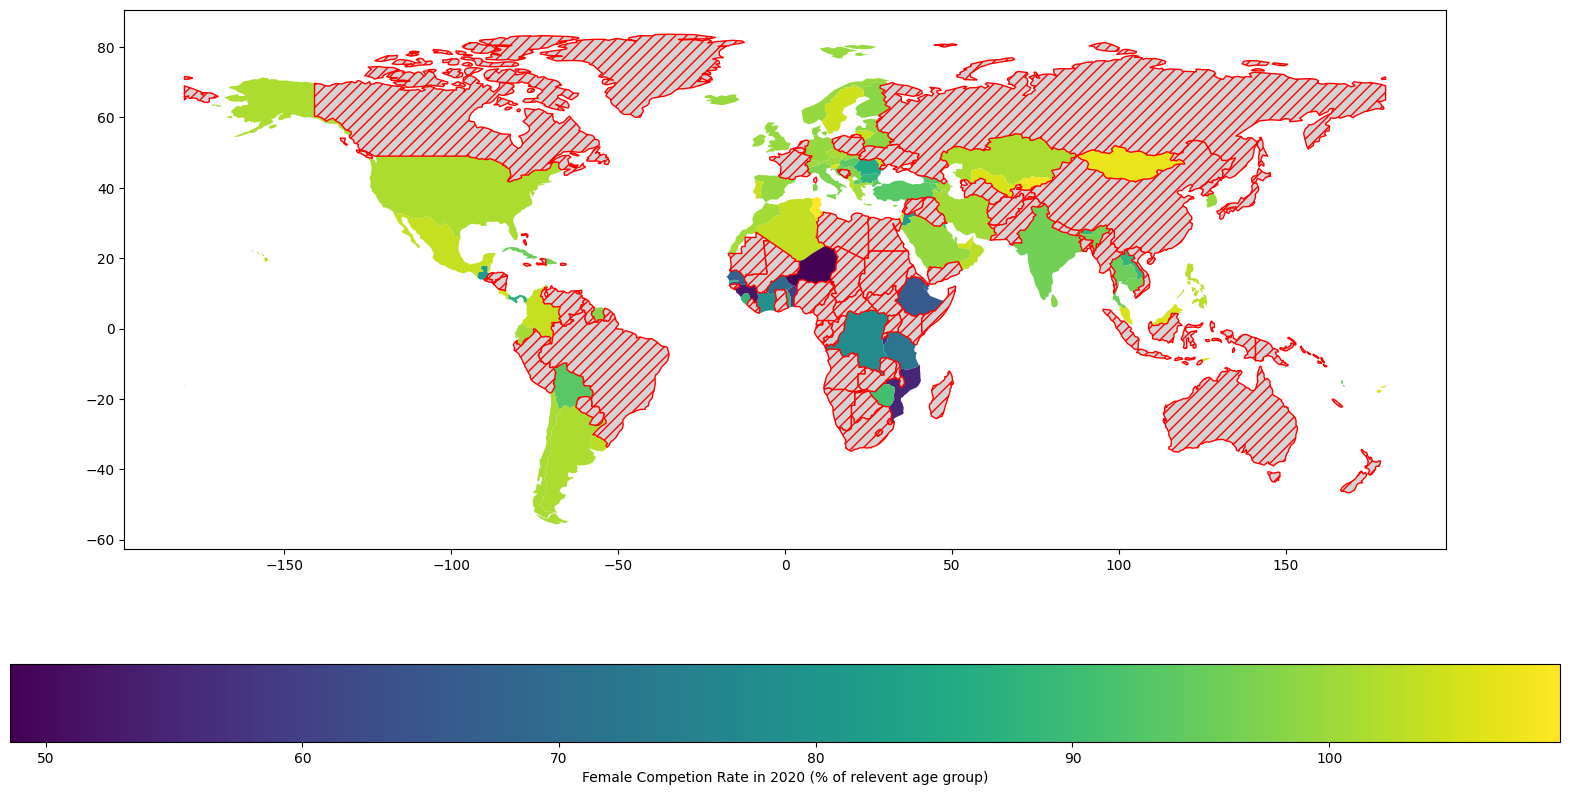

In [29]:
merged_df.plot(
    column="2020", 
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
    legend_kwds={"label": "Female Competion Rate in 2020 (% of relevent age group)", "orientation": "horizontal"}
    )